In [87]:
%run Preprocessing_main.ipynb

In [33]:
MVP_data['G_x'] = MVP_data['G_x'].astype(int)

In [35]:
def drop_col(data):
    corr = data.corr()
    NEW_data = data
    del_list = []
    for i in corr:
        for ind in corr[(corr[i]>0.9)&(corr[i]<1)].index:
            if ind not in del_list:
                try:
                    NEW_data = NEW_data.drop(ind, axis = 1)
                except:
                    continue
        del_list.append(i)
    NEW_data = NEW_data.drop('Player', axis = 1)
    return NEW_data

In [36]:
NEW_data = drop_col(MVP_data)

In [37]:
# standardize through years
def std_scale_split(data, year_names):
    scaler = StandardScaler()
    X_train_result = pd.DataFrame()
    X_test_result = pd.DataFrame()
    y_train_result = pd.DataFrame()
    y_test_result = pd.DataFrame()
    for i in year_names:
        
        data_year = data[data['year_y']==i]
        data_year = data_year.drop(columns='year_y')
        
        X = data_year.iloc[:, :-1]
        y = data_year.iloc[:, -1]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)
        train_scaled = scaler.fit_transform(X_train)
        test_scaled = scaler.transform(X_test)
        
        X_train_result = pd.concat([X_train_result, pd.DataFrame(train_scaled)])
        X_test_result = pd.concat([X_test_result, pd.DataFrame(test_scaled)])
        y_train_result = pd.concat([y_train_result, y_train])
        y_test_result = pd.concat([y_test_result, y_test])
        
    return X_train_result, X_test_result, y_train_result, y_test_result

X_train, X_test, y_train, y_test = std_scale_split(NEW_data, year_names)

In [38]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
y_train_pred = regressor.predict(X_train)
print(regressionSummary(y_train, y_train_pred))
print(regressionSummary(y_test, y_pred))
lin_mse = mean_squared_error(y_test, y_pred)
comp = pd.DataFrame({0: y_test[0], 1: y_pred.reshape(len(y_pred))})
y_pred_sorted = comp.sort_values(1, ascending=False)[0]
y_pred_lin = y_pred_sorted


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 0.1983
            Mean Absolute Error (MAE) : 0.1541
          Mean Percentage Error (MPE) : -480.8082
Mean Absolute Percentage Error (MAPE) : 3054.9236
None

Regression statistics

                      Mean Error (ME) : -0.0171
       Root Mean Squared Error (RMSE) : 0.1603
            Mean Absolute Error (MAE) : 0.1254
          Mean Percentage Error (MPE) : -192.2601
Mean Absolute Percentage Error (MAPE) : 922.2176
None


In [39]:
cor = np.corrcoef(np.array(y_test).reshape(len(y_test)), np.array(y_pred).reshape(len(y_pred)))
lin_cor = cor[1, 0]

In [40]:
regressor = SVR()
regressor.fit(X = X_train, y = y_train)
y_pred = regressor.predict(X_test)
y_train_pred = regressor.predict(X_train)
print(regressionSummary(y_train, y_train_pred))
print(regressionSummary(y_test, y_pred))
SVR_mse = mean_squared_error(y_test, y_pred)
comp = pd.DataFrame({0: y_test[0], 1: y_pred.reshape(len(y_pred))})
y_pred_sorted = comp.sort_values(1, ascending=False)[0]
y_pred_SVR = y_pred_sorted


Regression statistics

                      Mean Error (ME) : -0.0128
       Root Mean Squared Error (RMSE) : 0.1078
            Mean Absolute Error (MAE) : 0.0824
          Mean Percentage Error (MPE) : -1233.9688
Mean Absolute Percentage Error (MAPE) : 1890.8296
None

Regression statistics

                      Mean Error (ME) : -0.0461
       Root Mean Squared Error (RMSE) : 0.2011
            Mean Absolute Error (MAE) : 0.1626
          Mean Percentage Error (MPE) : -1089.9168
Mean Absolute Percentage Error (MAPE) : 1289.5220
None


In [10]:
cor = np.corrcoef(np.array(y_test).reshape(len(y_test)), np.array(y_pred).reshape(len(y_pred)))
SVR_cor = cor[1, 0]

In [11]:
fin_alpha = 0
min_mse = 1E20
fin_cor = -1
for alpha in np.linspace(0, 0.5, 21):
    regressor = DecisionTreeRegressor(ccp_alpha = alpha, random_state = 1)
    regressor.fit(X = X_train, y = np.array(y_train).reshape(len(y_train), ))
    y_pred = regressor.predict(X_test)
    y_train_pred = regressor.predict(X_train)
    MSE = mean_squared_error(y_test, y_pred)
    cor = np.corrcoef(np.array(y_test).reshape(len(y_test)), np.array(y_pred).reshape(len(y_pred)))
    if cor[1, 0] > fin_cor:
        fin_alpha = alpha
        fin_cor = cor[1, 0]
        y_pred_tree = y_pred
print('alpha: {:1.4f}, CORR: {:1.4f}'.format(fin_alpha, fin_cor))
tree_cor = fin_cor
comp = pd.DataFrame({0: y_test[0], 1: y_pred_tree.reshape(len(y_pred_tree))})
y_pred_sorted = comp.sort_values(1, ascending=False)[0]
y_pred_tree = y_pred_sorted

alpha: 0.0250, CORR: 0.3836


In [12]:
min_mse = 1E20
fin_alpha = 0
fin_NE = 0
fin_cor = -1

for alpha in np.linspace(0, 0.5, 11):
    for n_e  in np.linspace(10, 100, 10):
        regressor = RandomForestRegressor(n_estimators = int(n_e), ccp_alpha = alpha, random_state = 1)
        regressor.fit(X = X_train, y = np.array(y_train).reshape(len(y_train), ))
        y_pred = regressor.predict(X_test)
        y_train_pred = regressor.predict(X_train)
        MSE = mean_squared_error(y_test, y_pred)
        cor = np.corrcoef(np.array(y_test).reshape(len(y_test)), np.array(y_pred).reshape(len(y_pred)))
        if cor[1, 0] > fin_cor:
            fin_alpha = alpha
            fin_cor = cor[1, 0]
            y_pred_for = y_pred
print('alpha: {:1.4f}, CORR: {:1.4f}'.format(fin_alpha, fin_cor))
for_cor = fin_cor
comp = pd.DataFrame({0: y_test[0], 1: y_pred_for.reshape(len(y_pred_for))})
y_pred_sorted = comp.sort_values(1, ascending=False)[0]
y_pred_for = y_pred_sorted

alpha: 0.0500, CORR: 0.4273


### Neural Network

In [13]:
# standardize through years
def nor_scale_split(data, year_names):
    scaler = MinMaxScaler()

    X_train_result = pd.DataFrame()
    X_test_result = pd.DataFrame()
    y_train_result = pd.DataFrame()
    y_test_result = pd.DataFrame()
    for i in year_names:
        
        data_year = data[data['year_y']==i]
        data_year = data_year.drop(columns='year_y')
        
        X = data_year.iloc[:, :-1]
        y = data_year.iloc[:, -1]
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)
        train_scaled = scaler.fit_transform(X_train)
        test_scaled = scaler.transform(X_test)
        
        X_train_result = pd.concat([X_train_result, pd.DataFrame(train_scaled)])
        X_test_result = pd.concat([X_test_result, pd.DataFrame(test_scaled)])
        y_train_result = pd.concat([y_train_result, y_train])
        y_test_result = pd.concat([y_test_result, y_test])
        
    return X_train_result, X_test_result, y_train_result, y_test_result

X_train, X_test, y_train, y_test = nor_scale_split(NEW_data, year_names)

In [13]:
best_cor = 0
best_bat = 0
best_size = 0

for size1 in [int(i) for i in np.linspace(5, 20, 16)]:
    for bat in [int(i) for i in np.linspace(0, 100, 21)]:
        NNRegressor = MLPRegressor(hidden_layer_sizes = (size1), batch_size = bat, 
                                   activation = 'logistic', random_state= 1)
        NNRegressor.fit(X_train, y_train)
        y_pred = NNRegressor.predict(X_test)
        NN_cor = np.corrcoef(np.array(y_test).reshape(len(y_test)), np.array(y_pred).reshape(len(y_pred)))
        NN_cor = NN_cor[1, 0]
        if NN_cor > best_cor:
            best_cor = NN_cor
            best_size = size1
            best_bat = bat
print('layer size: {:1.4f}, batch size: {:1.4f}, CORR: {:1.4f}'.format(best_size, best_bat, best_cor))
NN_cor = best_cor

layer size: 16.0000, batch size: 45.0000, CORR: 0.6534


In [14]:
print('Linear regression: {:1.4f}'.format(lin_cor))
print('SVR: {:1.4f}'.format(SVR_cor))
print('Decision tree: {:1.4f}'.format(tree_cor))
print('Random forest: {:1.4f}'.format(for_cor))
print('Neural Network: {:1.4f}'.format(NN_cor))

Linear regression: 0.6673
SVR: 0.4868
Decision tree: 0.3836
Random forest: 0.4273
Neural Network: 0.6534


In [14]:
NNRegressor = MLPRegressor(hidden_layer_sizes = (8), batch_size = 45, 
                                   activation = 'logistic', random_state= 1)
NNRegressor.fit(X_train, y_train)
y_pred = NNRegressor.predict(X_test)
NN_cor = np.corrcoef(np.array(y_test).reshape(len(y_test)), np.array(y_pred).reshape(len(y_pred)))
cor_best_r2 = NN_cor[1, 0]
comp = pd.DataFrame({0: y_test[0], 1: y_pred.reshape(len(y_pred))})
y_pred_sorted = comp.sort_values(1, ascending=False)[0]
y_pred_NN = y_pred_sorted
print('layer size: {:1.4f}, batch size: {:1.4f}, R2: {:1.4f}'.format(8, 45, cor_best_r2))

layer size: 8.0000, batch size: 45.0000, R2: 0.6443


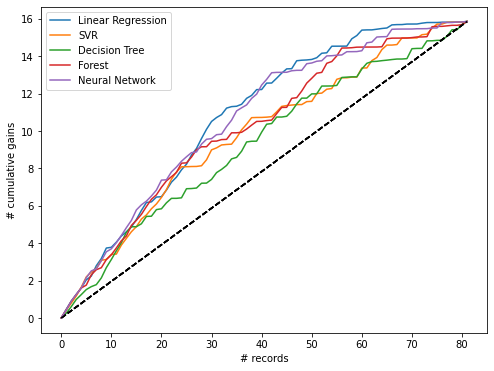

In [15]:
ax = gainsChart(pd.Series(y_pred_lin), label = 'Linear Regression',figsize = [8, 6], color = 'C0')
ax = gainsChart(pd.Series(y_pred_SVR), label = 'SVR', ax = ax, color = 'C1')
ax = gainsChart(pd.Series(y_pred_tree), label = 'Decision Tree', ax = ax, color = 'C2')
ax = gainsChart(pd.Series(y_pred_for), label = 'Forest', ax = ax, color = 'C3')
ax = gainsChart(pd.Series(y_pred_NN), label = 'Neural Network', ax = ax, color = 'C4')
plt.legend()
plt.show()

# Evaluation

## Linear regression

### Summary

In [41]:
# preprocessing
X_train, X_test, y_train, y_test = std_scale_split(NEW_data, year_names)

# build model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# model summary
y_pred = regressor.predict(X_test)
y_train_pred = regressor.predict(X_train)

print('Model: linear regression\n')
regressionSummary(y_test, y_pred)

# evaluations
cor = np.corrcoef(np.array(y_test).reshape(len(y_test)), np.array(y_pred).reshape(len(y_pred)))
lin_cor = cor[1, 0]

lin_R2 = r2_score(np.array(y_test).reshape(len(y_test)), np.array(y_pred).reshape(len(y_pred)))

lin_RMSE = mean_squared_error(np.array(y_test).reshape(len(y_test)), np.array(y_pred).reshape(len(y_pred)))**0.5
print('\nCORR: {:1.4f}'.format(lin_cor))
print('R2: {:1.4f}'.format(lin_R2))
print('RMSE: {:1.4f}'.format(lin_RMSE))

Model: linear regression


Regression statistics

                      Mean Error (ME) : -0.0171
       Root Mean Squared Error (RMSE) : 0.1603
            Mean Absolute Error (MAE) : 0.1254
          Mean Percentage Error (MPE) : -192.2601
Mean Absolute Percentage Error (MAPE) : 922.2176

CORR: 0.6673
R2: 0.1980
RMSE: 0.1603


### Visualization

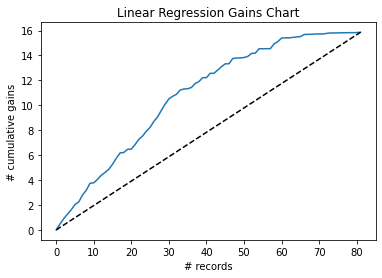

In [42]:
ax = gainsChart(pd.Series(y_pred_lin), label = 'Linear regression')
plt.title('Linear Regression Gains Chart')
plt.show()

## Neural network

In [43]:
# preprocessing
X_train, X_test, y_train, y_test = nor_scale_split(NEW_data, year_names)

# build model
NN = MLPRegressor(hidden_layer_sizes = (8), batch_size = 45, 
                                   activation = 'logistic', random_state= 1)
NN.fit(X_train, y_train)

# model summary
y_pred = NN.predict(X_test)
y_train_pred = NN.predict(X_train)

print('Model: Neural network\n')
regressionSummary(y_test, y_pred)

# evaluations
cor = np.corrcoef(np.array(y_test).reshape(len(y_test)), np.array(y_pred).reshape(len(y_pred)))
NN_cor = cor[1, 0]

NN_R2 = r2_score(np.array(y_test).reshape(len(y_test)), np.array(y_pred).reshape(len(y_pred)))

NN_RMSE = mean_squared_error(np.array(y_test).reshape(len(y_test)), np.array(y_pred).reshape(len(y_pred)))**0.5
print('\nCORR: {:1.4f}'.format(NN_cor))
print('R2: {:1.4f}'.format(NN_R2))
print('RMSE: {:1.4f}'.format(NN_RMSE))

Model: Neural network


Regression statistics

                      Mean Error (ME) : 0.0076
       Root Mean Squared Error (RMSE) : 0.1375
            Mean Absolute Error (MAE) : 0.1080
          Mean Percentage Error (MPE) : -701.2931
Mean Absolute Percentage Error (MAPE) : 880.8651

CORR: 0.6443
R2: 0.4101
RMSE: 0.1375


### Visualization

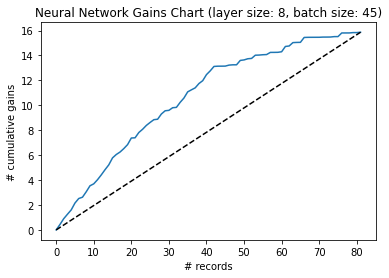

In [44]:
ax = gainsChart(pd.Series(y_pred_NN), label = 'Neural Network')
plt.title('Neural Network Gains Chart (layer size: 8, batch size: 45)')
plt.show()

# Prediction

In [88]:
data_2022['G_x'] = data_2022['G_x'].astype(int)
NEW_2022 = data_2022.drop(['Rk', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'VORP'], axis = 1)
player_list = NEW_2022['Player']
NEW_2022 = NEW_2022.drop('Player', axis = 1)

In [89]:
scaler = StandardScaler()
scaled_2022 = scaler.fit_transform(NEW_2022)
pred_22_lin = regressor.predict(scaled_2022)

In [90]:
scaler = MinMaxScaler()
scaled_2022 = scaler.fit_transform(NEW_2022)
pred_22_NN = NN.predict(scaled_2022)

In [91]:
NEW_2022['Player'] = player_list
NEW_2022['share_lin'] = pred_22_lin
NEW_2022['share_NN'] = pred_22_NN

In [92]:
NEW_2022.sort_values('share_lin', ascending=False).head(10)

,G_x,MP_x,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,...,TOV%,USG%,OWS,DWS,OBPM,DBPM,BPM,Player,share_lin,share_NN
715,74,33.5,27.1,13.8,7.9,1.5,0.9,0.583,0.337,0.810,...,15.6,31.9,10.8,4.5,9.2,4.5,13.7,Nikola Jokić\jokicni01,1.043004,0.401293
27,67,32.9,29.9,11.6,5.8,1.1,1.4,0.553,0.293,0.722,...,12.2,34.9,9.2,3.7,7.6,3.5,11.2,Giannis Antetokounmpo\antetgi01,0.941525,0.376545
1292,76,35.9,26.9,8.0,4.4,1.0,0.6,0.453,0.353,0.853,...,10.9,32.1,5.0,4.6,4.3,0.6,4.9,Jayson Tatum\tatumja01,0.805944,0.289471
1470,76,34.9,28.4,3.7,9.7,0.9,0.1,0.460,0.382,0.904,...,14.5,34.4,9.0,1.0,7.1,-2.0,5.2,Trae Young\youngtr01,0.796768,0.310056
292,65,35.4,28.4,9.1,8.7,1.2,0.6,0.457,0.353,0.744,...,15.3,37.4,3.8,3.8,6.4,1.8,8.2,Luka Dončić\doncilu01,0.794076,0.320073
344,68,33.8,30.6,11.7,4.2,1.1,1.5,0.499,0.371,0.814,...,11.3,37.2,7.9,4.1,7.2,2.0,9.2,Joel Embiid\embiijo01,0.773248,0.335062
261,64,34.5,25.5,5.2,6.3,1.3,0.4,0.437,0.380,0.923,...,13.2,30.8,4.6,3.4,5.4,0.4,5.8,Stephen Curry\curryst01,0.703870,0.277143
106,68,34.5,26.8,5.0,4.8,1.1,0.4,0.466,0.383,0.868,...,9.3,32.0,4.3,3.3,3.9,0.2,4.1,Devin Booker\bookede01,0.629424,0.264285
935,67,33.8,25.9,4.2,5.3,1.5,0.2,0.448,0.355,0.853,...,11.7,32.9,4.7,2.5,4.6,-0.3,4.3,Donovan Mitchell\mitchdo01,0.623775,0.266736
1350,74,33.5,24.6,9.8,3.6,1.0,1.1,0.529,0.410,0.822,...,13.7,27.8,7.1,3.2,4.5,0.5,5.0,Karl-Anthony Towns\townska01,0.616790,0.274792


In [93]:
NEW_2022.sort_values('share_NN', ascending=False).head(10)

,G_x,MP_x,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,...,TOV%,USG%,OWS,DWS,OBPM,DBPM,BPM,Player,share_lin,share_NN
715,74,33.5,27.1,13.8,7.9,1.5,0.9,0.583,0.337,0.810,...,15.6,31.9,10.8,4.5,9.2,4.5,13.7,Nikola Jokić\jokicni01,1.043004,0.401293
27,67,32.9,29.9,11.6,5.8,1.1,1.4,0.553,0.293,0.722,...,12.2,34.9,9.2,3.7,7.6,3.5,11.2,Giannis Antetokounmpo\antetgi01,0.941525,0.376545
344,68,33.8,30.6,11.7,4.2,1.1,1.5,0.499,0.371,0.814,...,11.3,37.2,7.9,4.1,7.2,2.0,9.2,Joel Embiid\embiijo01,0.773248,0.335062
292,65,35.4,28.4,9.1,8.7,1.2,0.6,0.457,0.353,0.744,...,15.3,37.4,3.8,3.8,6.4,1.8,8.2,Luka Dončić\doncilu01,0.794076,0.320073
1046,65,32.9,14.7,4.4,10.8,1.9,0.3,0.493,0.317,0.837,...,15.6,19.7,5.8,3.6,3.1,2.3,5.4,Chris Paul\paulch01,0.549852,0.313866
1470,76,34.9,28.4,3.7,9.7,0.9,0.1,0.460,0.382,0.904,...,14.5,34.4,9.0,1.0,7.1,-2.0,5.2,Trae Young\youngtr01,0.796768,0.310056
668,56,37.2,30.3,8.2,6.2,1.3,1.1,0.524,0.359,0.756,...,12.5,32.3,5.2,2.3,6.9,0.8,7.7,LeBron James\jamesle01,0.567513,0.307087
455,66,32.1,15.6,14.7,1.1,0.7,2.1,0.713,0.000,0.690,...,14.5,16.9,7.3,4.3,2.9,1.7,4.6,Rudy Gobert\goberru01,0.229007,0.305910
336,55,37.2,29.9,7.4,6.4,0.9,0.9,0.518,0.383,0.910,...,12.9,31.2,6.4,2.0,6.4,0.7,7.2,Kevin Durant\duranke01,0.560173,0.296767
1292,76,35.9,26.9,8.0,4.4,1.0,0.6,0.453,0.353,0.853,...,10.9,32.1,5.0,4.6,4.3,0.6,4.9,Jayson Tatum\tatumja01,0.805944,0.289471
